In [65]:
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import os

# Extract CSV zip files
if not os.path.isfile('mhealth_raw_data.csv'):
    with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

m_health_raw_data = pd.read_csv('mhealth_raw_data.csv')

In [66]:
# We see lowest category is 10342 samples
m_health_raw_data['Activity'].value_counts()
# Let's sample 10000 entries for each category

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [ ]:
# m_health_data = m_health_raw_data.drop('subject', axis=1)
m_health_data = m_health_raw_data
m_health_data['subject'].unique()
seed=42

df = pd.DataFrame()
for i in m_health_data['Activity'].unique():
    samples = m_health_data[m_health_data['Activity'] == i].sample(random_state=seed, n=10000)
    df = pd.concat([df, samples])

# label encoding Subjects by mapping
map_subj = {
    'subject1': 0,
    'subject2': 1,
    'subject3': 2,
    'subject4': 3,
    'subject5': 4,
    'subject6': 5,
    'subject7': 6,
    'subject8': 7,
    'subject9': 8,
    'subject10': 9
}

ms = df.copy()
ms['subject'] = ms['subject'].map(map_subj)
print(ms.head())

             alx      aly      alz      glx      gly       glz     arx  \
1212350  1.33590  -9.7394 -1.66110  0.58813 -0.58724 -0.662080 -3.2703   
134482   2.52730 -12.7320 -3.88220  0.51763 -0.58537 -0.758350 -4.3463   
820343   0.55205  -9.7466  1.58070  0.55288 -0.76173 -0.176820 -5.8155   
718210   2.49960  -9.3680  1.81700  0.73655 -0.55159  0.068762 -3.0504   
118798  -3.48370  -9.2520  0.54423 -0.37662 -0.61163  0.609040 -6.5952   

              ary      arz       grx      gry      grz  Activity  subject  
1212350  -9.05310 -0.30682  0.401960 -1.06160  0.14655         0        9  
134482  -10.51300  1.71390 -0.272550 -0.76591  0.85129         0        0  
820343   -8.16430 -2.42900  0.137250 -0.99795  0.52155         0        6  
718210   -5.91350  4.65220  0.084314 -0.71047  0.90086         0        5  
118798   -0.79894  7.10590 -0.900000  1.14580  0.81897         0        0  


In [80]:
print(ms['Activity'].value_counts())
display(ms.describe())

Activity
0     10000
1     10000
2     10000
3     10000
4     10000
6     10000
7     10000
8     10000
9     10000
10    10000
11    10000
12    10000
5     10000
Name: count, dtype: int64


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
count,130000.000000,130000.000000,130000.000000,130000.000000,130000.00000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000,130000.000000
mean,1.712190,-9.092605,-0.833864,0.081737,-0.56323,-0.137402,-3.520445,-5.656282,2.318159,-0.228825,-0.416495,0.358143,6.000000,4.419592
std,4.431388,5.286531,6.568060,0.467020,0.41718,0.554810,6.041450,6.593481,4.251687,0.543354,0.544666,0.528319,3.741672,2.884315
min,-22.146000,-19.609000,-19.365000,-1.777400,-7.78990,-2.622800,-22.345000,-18.972000,-18.230000,-2.219600,-3.552400,-2.504300,0.000000,0.000000
25%,0.082362,-10.137000,-3.664900,-0.374770,-0.81051,-0.591360,-5.221425,-9.535500,0.051838,-0.696080,-0.839840,-0.077586,3.000000,2.000000
50%,1.332000,-9.601300,0.261925,0.172540,-0.69043,-0.123770,-2.504100,-7.562000,1.776100,-0.333330,-0.597540,0.424570,6.000000,4.000000
75%,2.892000,-7.492100,1.771100,0.484230,-0.49719,0.345780,-0.517068,-1.843100,5.181400,0.205880,-0.051335,0.829740,9.000000,7.000000
max,20.033000,21.161000,25.005000,1.705000,1.97750,1.799600,19.801000,21.965000,25.741000,1.429400,1.540000,2.254300,12.000000,9.000000


<Axes: >

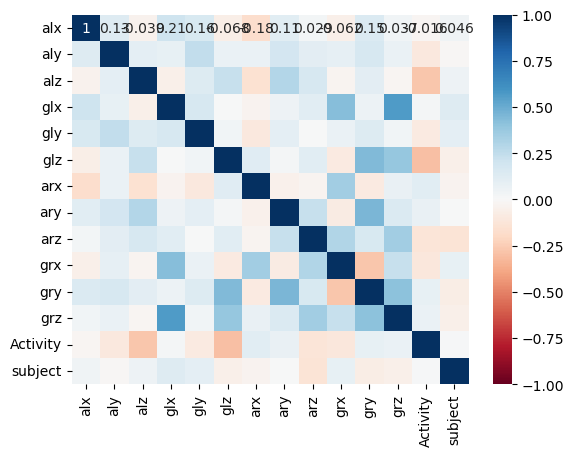

In [82]:
corr = ms.corr(method='spearman')
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(ms)
print(df_scaled)
print(df_scaled.shape)
df_scaled[:, 12] = df_scaled[:, 12] * 12

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled['Activity'] = df_scaled['Activity'].astype(int)
print(df_scaled)
print(df_scaled.describe())
print(df_scaled["Activity"].unique())

[[0.55672017 0.24207996 0.39900609 ... 0.5570651  0.         1.        ]
 [0.58496645 0.16867795 0.34894749 ... 0.70516328 0.         0.        ]
 [0.53813628 0.24190336 0.47206897 ... 0.63586979 0.         0.66666667]
 ...
 [0.63203253 0.17027226 0.31707235 ... 0.61548985 0.41666667 0.44444444]
 [0.56965552 0.18999264 0.47702727 ... 0.63496407 0.41666667 0.88888889]
 [0.59585102 0.22558254 0.35518819 ... 0.69248308 0.41666667 0.77777778]]
(130000, 14)
             alx       aly       alz       glx       gly       glz       arx  \
0       0.556720  0.242080  0.399006  0.679282  0.737418  0.443361  0.452586   
1       0.584966  0.168678  0.348947  0.659037  0.737610  0.421592  0.427056   
2       0.538136  0.241903  0.472069  0.669159  0.719554  0.553089  0.392196   
3       0.584310  0.251190  0.477395  0.721902  0.741068  0.608620  0.457804   
4       0.442455  0.254035  0.448709  0.402246  0.734921  0.730789  0.373696   
...          ...       ...       ...       ...       ...       

In [86]:
# feature expansion magnitude of acceleration
df_scaled['Magnitude Acc'] = np.sqrt(df_scaled['alx']**2 + df_scaled['aly']**2 + df_scaled['alz']**2)
print(df_scaled.columns)
print(df_scaled.describe())

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject', 'Magnitude Acc'],
      dtype='object')
                 alx            aly            alz            glx  \
count  130000.000000  130000.000000  130000.000000  130000.000000   
mean        0.565641       0.257944       0.417650       0.533867   
std         0.105061       0.129667       0.148029       0.134109   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.527001       0.232328       0.353845       0.402777   
50%         0.556628       0.245467       0.442347       0.559941   
75%         0.593613       0.297201       0.476360       0.649446   
max         1.000000       1.000000       1.000000       1.000000   

                 gly            glz            arx            ary  \
count  130000.000000  130000.000000  130000.000000  130000.000000   
mean        0.739877       0.562002       0.446651       0.325273   
std       

<Axes: >

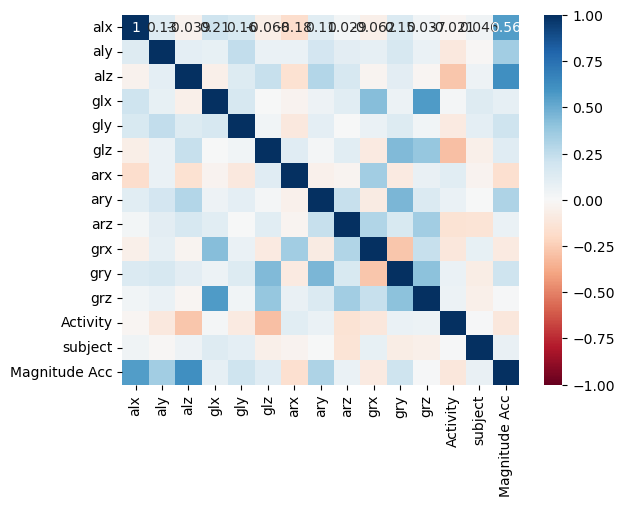

In [87]:
boo = df_scaled.corr(method='spearman')
sns.heatmap(boo, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('Activity', axis = 1), df_scaled['Activity'], test_size=0.2, random_state=seed)

print(X_train.head())
print(y_train.head())

             alx       aly       alz       glx       gly       glz       arx  \
101619  0.478065  0.140741  0.279973  0.678747  0.717633  0.618838  0.027903   
99268   0.648133  0.192494  0.350174  0.532238  0.720514  0.425590  0.011816   
123277  0.568539  0.158891  0.319231  0.398515  0.747791  0.381166  0.474439   
62829   0.582150  0.249723  0.431762  0.729359  0.737034  0.615729  0.556893   
82514   0.485341  0.254803  0.340690  0.604695  0.731271  0.663262  0.412542   

             ary       arz       grx       gry       grz  Magnitude Acc  
101619  0.136551  0.340861  0.460504  0.675815  0.740491       0.571611  
99268   0.009356  0.894021  0.358411  0.588718  0.534420       0.761414  
123277  0.255600  0.440688  0.805484  0.528637  0.498640       0.671112  
62829   0.688035  0.469346  0.801184  0.820976  0.650815       0.766602  
82514   0.201700  0.562550  0.826977  0.629846  0.705163       0.645407  
101619    11
99268     10
123277     5
62829      6
82514      9
Name: Acti

In [ ]:
# We will now perform logistic regression with label encoding on the activities.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Checking training error
y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

# Checking testing error
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Printing accuracy, precision, and recall

print("Train Accuracy:", accuracy)
# print("Confusion Matrix:")
# print(conf_matrix)
print("Train Classification Report:")
print(class_report)

print("Test Accuracy:", accuracy)
# print("Confusion Matrix:")
# print(conf_matrix)
print("Test Classification Report:")
print(class_report)

c:\Users\choco\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.5577307692307693
Train Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.02      0.04      7981
           1       0.52      0.59      0.55      7963
           2       0.57      0.60      0.58      8012
           3       0.91      1.00      0.96      7969
           4       0.45      0.48      0.47      7965
           5       0.43      0.26      0.32      8020
           6       0.47      0.68      0.56     15967
           8       0.48      0.54      0.51      7998
           9       0.77      0.88      0.82      8052
          10       0.55      0.57      0.56      7954
          11       0.62      0.68      0.65      8088
          12       0.46      0.27      0.34      8031

    accuracy                           0.56    104000
   macro avg       0.53      0.55      0.53    104000
weighted avg       0.53      0.56      0.53    104000

Test Accuracy: 0.5574230769230769
Test Classification Report:
       